In [1]:
from preprocessing import FeatExtractor
from utils import SlidingWindow
import numpy as np
import cv2
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


In [2]:
path = "data/vehicles/KITTI_extracted/*.png"
vehicles = glob.glob(path)
path = "data/vehicles/GTI_Far/*.png"
vehicles += glob.glob(path)
path = "data/vehicles/GTI_Left/*.png"
vehicles += glob.glob(path)
path = "data/vehicles/GTI_MiddleClose/*.png"
vehicles += glob.glob(path)
path = "data/vehicles/GTI_Right/*.png"
vehicles += glob.glob(path)

path = "data/non-vehicles/Extras/*.png"
non_vehicles = glob.glob(path)
path = "data/non-vehicles/GTI/*.png"
non_vehicles += glob.glob(path)

In [3]:
X_CH = []
X_HOG = []
X_SP = []
for p in vehicles:
    image = (255*mpimg.imread(p))
    
    feat_CH = FeatExtractor.extract_COLOR_Histograms(image, nbins=16)
    X_CH.append(np.array(feat_CH))
      
    image_hog = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
    feat_HOG = FeatExtractor.extract_HOG(image_hog, orient=9, cell_per_block=2, pix_per_cell=8,  channels="ALL")
    X_HOG.append(feat_HOG)
    
    feat_SP = FeatExtractor.extract_spatial_bin(image, size=(32, 32))
    X_SP.append(np.array(feat_SP))
    
    
for p in non_vehicles:
    image = (255*mpimg.imread(p))
    
    feat_CH = FeatExtractor.extract_COLOR_Histograms(image, nbins=16)
    X_CH.append(np.array(feat_CH))
    
    image_hog = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
    feat_HOG = FeatExtractor.extract_HOG(image_hog, orient=9, cell_per_block=2, pix_per_cell=8,   channels="ALL")
    X_HOG.append(feat_HOG)
    
    feat_SP = FeatExtractor.extract_spatial_bin(image, size=(32, 32))
    X_SP.append(np.array(feat_SP))

X_CH = np.array(X_CH)
X_HOG = np.array(X_HOG)
X_SP = np.array(X_SP)

/home/ruggero/anaconda3/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [4]:
y = []
for p in vehicles:
    y.append(1)
for p in non_vehicles:
    y.append(0)
y = np.array(y)

In [66]:
X = np.concatenate([X_CH, X_SP, X_HOG], axis=1)

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [68]:
from sklearn.svm import LinearSVC, SVC
model = LinearSVC(C=0.1)
model.fit(X_train, y_train)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [69]:
model.score(X_train,y_train), model.score(X_test,y_test)

(0.99394707207207211, 0.95608108108108103)

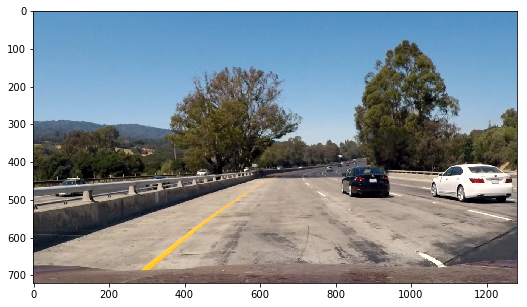

In [71]:
test_image = "data/test_images/test1.jpg"
image = mpimg.imread(test_image)
plt.figure(figsize=(10,5))
plt.imshow(image)
plt.show()

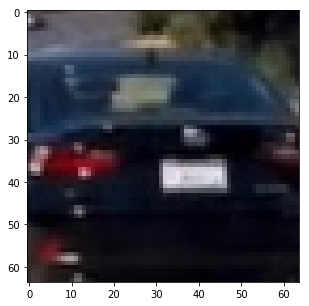

In [108]:
window = SlidingWindow(size=(80,80), init_pos = (850, 400))
cropped = window.crop_image(image, resize=(64,64))
plt.figure(figsize=(10,5))
plt.imshow(cropped)
plt.show()

In [110]:
im = cv2.cvtColor(cropped, cv2.COLOR_RGB2YCrCb)
features_HOG = FeatExtractor.extract_HOG(im, orient=9, cell_per_block=2, pix_per_cell=8,  channels="ALL")
feat_CH = FeatExtractor.extract_COLOR_Histograms(im, nbins=16)
feat_SP = FeatExtractor.extract_spatial_bin(im, size=(32, 32))
features = np.concatenate([feat_CH,feat_SP,feat_HOG])
features = features
model.predict(features)

/home/ruggero/anaconda3/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)
/home/ruggero/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1])

array([0])